In [1]:
#Function to display rankings of teams
function showrankings(IndextoTeams,Rankings)
           HelperDict = Dict{Int64, String}()
           RatingsDict = Dict{Float64, String}()
           for key in collect(keys(IndextoTeams))
              HelperDict[IndextoTeams[key]] = key
           end
           for i = 1:32
             RatingsDict[Rankings[i,1]] = HelperDict[i]
           end
           for key in sort(collect(keys(RatingsDict)), rev=true)
               println("$(RatingsDict[key]) => $(key)")
           end
    end

showrankings (generic function with 1 method)

In [2]:
#Reading in Data
using DelimitedFiles
using LinearAlgebra 
using Plots.PlotMeasures
Data = readdlm("reg_games_2019.csv.txt", ',') 
Data[:,3]

257-element Array{Any,1}:
 "home_team"
 "CHI"      
 "CAR"      
 "PHI"      
 "NYJ"      
 "MIN"      
 "MIA"      
 "JAX"      
 "CLE"      
 "LAC"      
 "SEA"      
 "TB"       
 "DAL"      
 ⋮          
 "BUF"      
 "DET"      
 "CAR"      
 "TB"       
 "NYG"      
 "HOU"      
 "DAL"      
 "BAL"      
 "JAX"      
 "DEN"      
 "LA"       
 "SEA"      

In [3]:
#Assigning every team an index
teamsToIndex = Dict("NYJ" => 1, "LAC" => 2, "NYG" => 3, "DAL" => 4, "PIT" => 5, "DET" => 6, "ARI" => 7, "MIN" => 8, "NE" => 9, "TB" => 10, "GB" => 11, "SF" => 12, "BUF" => 13, "TEN" => 14, "DEN" => 15, "IND" => 16, "PHI" => 17, "HOU" => 18, "WAS" => 19, "CIN" => 20, "OAK" => 21, "BAL" => 22, "CHI" => 23, "ATL" => 24, "CLE" => 25, "LA" => 26, "JAX" => 27, "MIA" => 28, "SEA" => 29, "NO" => 30, "KC" => 31, "CAR" => 32)

Dict{String,Int64} with 32 entries:
  "DET" => 6
  "BUF" => 13
  "CIN" => 20
  "HOU" => 18
  "PIT" => 5
  "CLE" => 25
  "NE"  => 9
  "MIA" => 28
  "IND" => 16
  "TEN" => 14
  "SF"  => 12
  "DAL" => 4
  "BAL" => 22
  "PHI" => 17
  "NYG" => 3
  "ARI" => 7
  "NO"  => 30
  "MIN" => 8
  "TB"  => 10
  "DEN" => 15
  "GB"  => 11
  "CHI" => 23
  "SEA" => 29
  "ATL" => 24
  "KC"  => 31
  ⋮     => ⋮

In [4]:
#Initializing Scores, Weighted Scores, and Main Matrix for Massey method
Scores = zeros(Int, size(Data,1)-1,1)
WeightedScores = zeros(Float64, size(Data, 1)-1,1)
MainMasseyMatrix = zeros(Float64, size(Data,1)-1,32)
PMainMasseyMatrix = zeros(Float64, size(Data,1)-1,32)

256×32 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [5]:
#Filling Main Massey Matrix, Scores, and Weighted Scores with correct values
for i = 2:size(Data,1)
    MainMasseyMatrix[i-1,teamsToIndex[Data[i,3]]] = 1
    MainMasseyMatrix[i-1,teamsToIndex[Data[i,4]]] = -1
end
for i = 2:size(Data,1)
    PMainMasseyMatrix[i-1,teamsToIndex[Data[i,3]]] = 1
    PMainMasseyMatrix[i-1,teamsToIndex[Data[i,4]]] = -1
end
for i = 2:size(Data,1)
    Scores[i-1,1] = Data[i,9] - Data[i,10]
    WeightedScores[i-1,1] = (Data[i,9] - Data[i,10])*(1 + (Data[i,5]-1)*(3/16))
end
#Perterbing the PMainMasseyMatrix
for i = 2:size(Data,1)
    for j = 1:32
        PMainMasseyMatrix[i-1,j] += 1*10^(-15)
    end
end
PMainMasseyMatrix

256×32 Array{Float64,2}:
  1.0e-15  1.0e-15   1.0e-15  1.0e-15  …   1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0    
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  1.0      1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15  …   1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15  -1.0      1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0       1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15  …   1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15  -1.0      1.0          1.0e-15   1.0e-15  1.0e-15
  1.0e-15  1.0e-15   1.0e-15  1.0e-15      1.0e-15   1.0e-15  1.0e-15
  ⋮                                    ⋱             ⋮           

In [6]:
#Finding least Squares Approximation of equation Massey Matrix * ranks = Scores
MasseyRanks = inv(transpose(MainMasseyMatrix)*MainMasseyMatrix)*transpose(MainMasseyMatrix)*Scores
PMasseyRanks = inv(transpose(PMainMasseyMatrix)*PMainMasseyMatrix)*transpose(PMainMasseyMatrix)*Scores
WeightedMasseyRanks = inv(transpose(MainMasseyMatrix)*MainMasseyMatrix)*transpose(MainMasseyMatrix)*WeightedScores
using Plots
#show Massey Team Rankings
println("Massey Ranks 2009")
showrankings(teamsToIndex,MasseyRanks)

Massey Ranks 2009
LA => 16.03125
NE => 14.5625
KC => 11.21875
BAL => 7.46875
BUF => 7.09375
DAL => 3.84375
SEA => 3.71875
HOU => 2.1875
CHI => 1.6875
NO => 1.1875
LAC => 0.78125
PIT => 0.75
MIN => -0.8125
PHI => -0.90625
CLE => -1.0625
CIN => -4.5
SF => -4.59375
GB => -4.6875
WAS => -4.90625
ARI => -5.84375
CAR => -7.65625
NYJ => -9.5
NYG => -9.8125
MIA => -10.125
TEN => -16.5625
ATL => -21.46875
DET => -21.9375
TB => -22.375
OAK => -23.375
DEN => -26.5625
JAX => -28.15625
IND => -34.09375


In [7]:
#show perturbed data
println("Perturbed Massey Ranks 2009")
showrankings(teamsToIndex,PMasseyRanks)

Perturbed Massey Ranks 2009
BAL => -18.315022826951985
SF => -21.826741576952017
NE => -22.592366576952013
KC => -27.057210326952017
MIN => -28.068929076952028
NO => -28.17439782695199
DAL => -28.611897826952
LA => -30.131429076952074
TEN => -30.35017907695199
BUF => -30.857991576952028
SEA => -31.56111657695201
GB => -31.74861657695207
PHI => -32.50252282695195
PIT => -33.26814782695197
ATL => -34.04158532695202
CLE => -34.42049157695202
TB => -34.799397826951974
CHI => -36.111897826952
LAC => -36.510335326952045
HOU => -36.71346032695199
ARI => -36.72127282695197
DEN => -37.936116576951996
IND => -38.36189782695193
JAX => -38.84627282695201
DET => -39.76814782695202
NYJ => -40.04549157695198
CAR => -40.299397826951974
NYG => -42.24080407695197
OAK => -42.385335326951996
CIN => -43.45174157695202
WAS => -45.20564782695191
MIA => -47.37361657695199


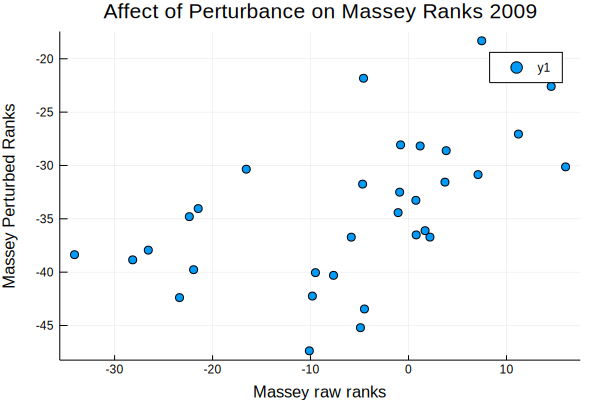

In [8]:
#Plotting MasseyRanks vs Massey Perturbed data - the farther the scatter plot is from a line, the greater significance perturbance has
plot(MasseyRanks, PMasseyRanks, seriestype=:scatter, title = "Affect of Perturbance on Massey Ranks 2009", xlabel = "Massey raw ranks", ylabel = "Massey Perturbed Ranks")

In [9]:
#Initializing PCA data
using LinearAlgebra
U,σ,V = svd(MainMasseyMatrix)
#U,σ,V = svd(PMainMasseyMatrix) Run This line instead of the one above for PCA on the perturbed Matrix
Eplus = zeros(Float64, 32,32)
EplusApproximate = zeros(Float64, 32, 32)
E = zeros(Float64, 32,32)
for x = 1:32
    Eplus[x,x] = 1/σ[x]
    E[x,x] = σ[x]
    if x<17
        EplusApproximate[x,x] = 1/σ[x]
    end
end


In [10]:
#Calculate PCA approximation for weighted and unweighted data
PCARanks = V*Eplus*transpose(U)*Scores
WeightedPCARanks = V*EplusApproximate*transpose(U)*WeightedScores
PCAApproximateRanks = V*EplusApproximate*transpose(U)*Scores
sum = 0;
Weightedsum = 0;
Approximatesum = 0;
for i = 1:32
    sum+= PCARanks[i,1]
    Weightedsum +=WeightedPCARanks[i,1]
    Approximatesum += PCAApproximateRanks[i,1]
end
avg = sum/32
Weightedavg = Weightedsum/32
Approximateavg = Approximatesum/32
for i = 1:32
    PCARanks[i,1] = PCARanks[i,1] - avg
    WeightedPCARanks[i,1] = WeightedPCARanks[i,1] - Weightedavg
    PCAApproximateRanks[i,1] = PCAApproximateRanks[i,1] - Approximateavg

end

In [11]:
#show PCA rankings
println("PCA rankings 2009")
showrankings(teamsToIndex,PCARanks)

PCA rankings 2009
BAL => 15.3125
SF => 11.5625
NE => 10.3125
KC => 8.8125
NO => 7.5625
DAL => 6.0625
MIN => 5.75
GB => 4.1875
LA => 3.8125
TEN => 3.4375
SEA => 2.25
BUF => 2.0625
TB => 1.3125
HOU => 0.1875
PHI => 0.0
ATL => -0.0625
CHI => -0.1875
CLE => -1.9375
DEN => -2.0625
LAC => -2.375
ARI => -2.625
IND => -2.6875
DET => -4.75
NYJ => -4.9375
JAX => -5.75
OAK => -6.5625
CAR => -6.9375
CIN => -7.125
NYG => -8.4375
WAS => -10.5625
MIA => -12.25


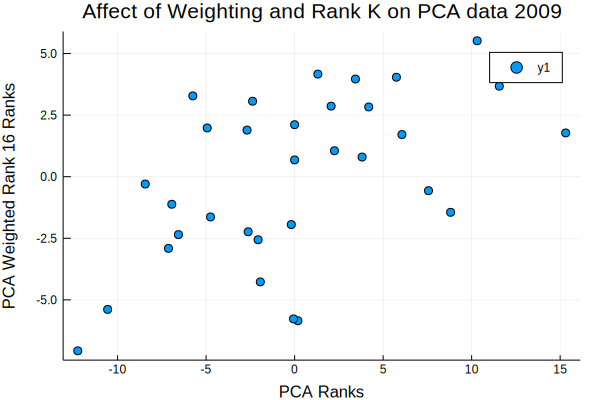

In [12]:
#Plotting PCARanks vs PCA Aproximate Weighted data - the farther the scatter plot is from a line, the greater significance weighting has
plot(PCARanks,PCAApproximateRanks,seriestype=:scatter, title = "Affect of Weighting and Rank K on PCA data 2009", xlabel = "PCA Ranks", ylabel = "PCA Weighted Rank 16 Ranks")

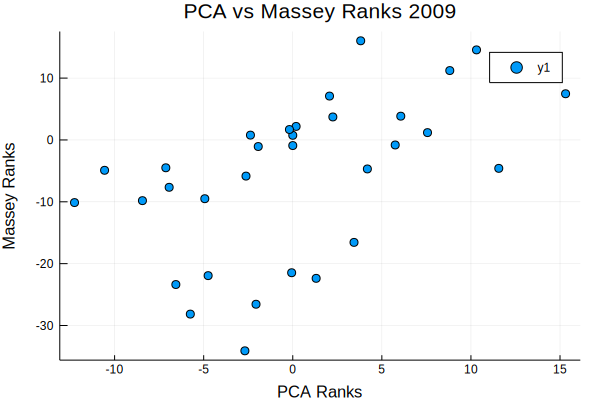

In [13]:
#plot Weighted Approximate PCARanks vs MasseyRanks, the closer this data is to a line, the more the two methods agree on rankings
plot(PCARanks, MasseyRanks,seriestype=:scatter, title = "PCA vs Massey Ranks 2009", xlabel = "PCA Ranks", ylabel = "Massey Ranks")

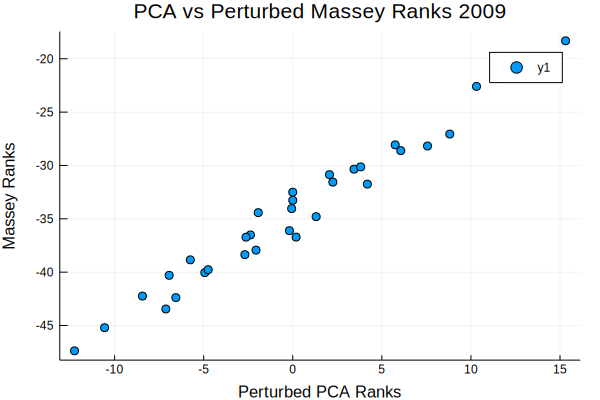

In [14]:
#plot Weighted Approximate PCARanks vs MasseyRanks, the closer this data is to a line, the more the two methods agree on rankings
plot(PCARanks, PMasseyRanks,seriestype=:scatter, title = "PCA vs Perturbed Massey Ranks 2009", xlabel = "Perturbed PCA Ranks", ylabel = "Massey Ranks")

In [15]:
#Initialize Keener Matrix, and Helper scores Matrix
KeenerMain = zeros(Float64,32,32)
ScoreMatrix = zeros(Int64,32,32)

32×32 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [16]:
#Calculate Main Keener Matrix
for i = 2:size(Data,1)
    #populate scores matrix
    ScoreMatrix[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]] += Data[i,9]
    ScoreMatrix[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]] += Data[i,10]
end
for i = 2:size(Data,1)
    #calculate (A_{ij}+1)/(A_{ij} + A_{ji} + 2) given results from scores matrix
    ScoresTeam1 = ScoreMatrix[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]]
    ScoresTeam2 = ScoreMatrix[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]]
    point1 = (ScoresTeam1 + 1)/(ScoresTeam1 + ScoresTeam2 + 2)
    point2 = (ScoresTeam2 + 1)/(ScoresTeam1 + ScoresTeam2 + 2)
    #normalize data
    KeenerMain[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]] = (1/2) + ((sign(point1 - (1/2)))*(sqrt(abs(2*point1 -1))))/2
    KeenerMain[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]] = (1/2) + ((sign(point2 - (1/2)))*(sqrt(abs(2*point2 -1))))/2
end
#Sloppy notation here, I really should be doing a double for loop through every i,j index, but this works too because any
#teams that play each other twice will just get reset to the same value at position i,j twice
#same process for weighted data
KeenerMainWeighted = zeros(Float64,32,32)
ScoreMatrixWeighted = zeros(Float64,32,32)
for i = 2:size(Data,1)
    ScoreMatrixWeighted[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]] += Data[i,9]*(1 + (Data[i,5]-1)*(2/16))
    ScoreMatrixWeighted[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]] += Data[i,10]*(1 + (Data[i,5]-1)*(2/16))
end
for i = 2:size(Data,1)
    ScoresTeam1 = ScoreMatrixWeighted[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]]
    ScoresTeam2 = ScoreMatrixWeighted[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]]
    point1 = (ScoresTeam1 + 1)/(ScoresTeam1 + ScoresTeam2 + 2)
    point2 = (ScoresTeam2 + 1)/(ScoresTeam1 + ScoresTeam2 + 2)
    KeenerMainWeighted[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]] += (1/2) + ((sign(point1 - (1/2)))*(sqrt(abs(2*point1 -1))))/2
    KeenerMainWeighted[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]] += (1/2) + ((sign(point2 - (1/2)))*(sqrt(abs(2*point2 -1))))/2
    #normalize data
end

In [17]:
#Calculate eigenvectors and eigenvalues
Keenervals, Keenervecs = eigen(KeenerMain)
KeenervalsWeighted, KeenervecsWeighted = eigen(KeenerMainWeighted)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
32-element Array{Complex{Float64},1}:
    7.57949984522476 + 0.0im                
   4.680879357127528 + 0.0im                
   4.513825728283012 + 0.0im                
   3.740019181831746 + 0.0im                
   2.698825239828003 + 0.0im                
 -0.8138794983178823 + 1.3573699645147121im 
 -0.8138794983178823 - 1.3573699645147121im 
 -1.4572625314018135 + 0.9225783655918127im 
 -1.4572625314018135 - 0.9225783655918127im 
 -1.6814893554782444 + 0.3411148292947288im 
 -1.6814893554782444 - 0.3411148292947288im 
 -0.6908322341663169 + 1.031546252344387im  
 -0.6908322341663169 - 1.031546252344387im  
                     ⋮                      
 -1.4471635725593968 + 0.0im                
 -0.4257391809841232 + 0.0im                
 -0.7927398476425717 + 0.8538626653271084im 
 -0.7927398476425717 - 0.8538626653271084im 
 -1.0085947106739603 + 0.7589788580111073im 
 

In [18]:
Keenersolution = zeros(Float64, 32, 1)
KeenersolutionWeighted = zeros(Float64, 32, 1)

32×1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [19]:
#Calculate solution vectors
for i = 1:32
  KeenersolutionWeighted[i] =convert(Float64, KeenervecsWeighted[i,1])
  Keenersolution[i] =convert(Float64, Keenervecs[i,1])
end
#make solution vectors have sum of one overall
sum = 0
sumWeighted = 0
for i = 1:32
  sumWeighted+=KeenersolutionWeighted[i]
  sum+=Keenersolution[i]
end
for i = 1:32
    KeenersolutionWeighted[i] = KeenersolutionWeighted[i]/sumWeighted
    Keenersolution[i] = Keenersolution[i]/sum
end
println("Keener 2009 predictions")
showrankings(teamsToIndex,Keenersolution)

Keener 2009 predictions
BAL => 0.04873135221383413
SF => 0.044866125017291314
NO => 0.04207109428895786
KC => 0.04174991980880386
NE => 0.03895098720661669
MIN => 0.03703938361195578
LA => 0.03682046526224116
SEA => 0.03675451992956661
GB => 0.036461050523615715
TEN => 0.03640139370815651
HOU => 0.03462253035689204
BUF => 0.03389800202531901
TB => 0.03236745984529826
ATL => 0.03150399266812964
IND => 0.03133498997065209
DAL => 0.03130981890950565
DEN => 0.030177544768385915
PIT => 0.03012814521210549
PHI => 0.029593923086356964
LAC => 0.029290966444676072
CAR => 0.027886389289036397
CHI => 0.027725393712126605
CLE => 0.02705895306685386
ARI => 0.026320060333007496
OAK => 0.026084359902014763
DET => 0.024519024941519165
NYJ => 0.024322020517069273
JAX => 0.023790737883330058
CIN => 0.02095729160579676
NYG => 0.01974011036916492
MIA => 0.019676839069781918
WAS => 0.01784515445193814


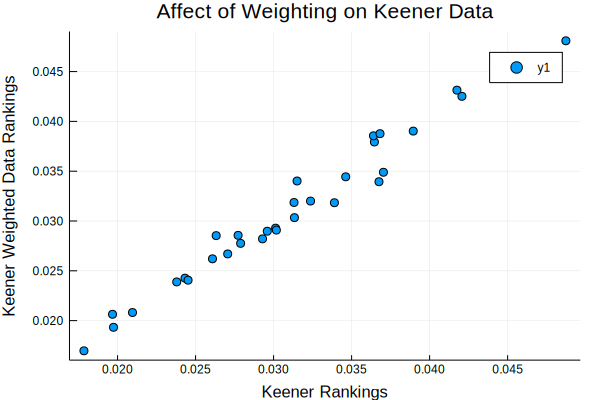

In [20]:
plot(Keenersolution, KeenersolutionWeighted,seriestype=:scatter, title="Affect of Weighting on Keener Data", xlabel = "Keener Rankings", ylabel = "Keener Weighted Data Rankings")

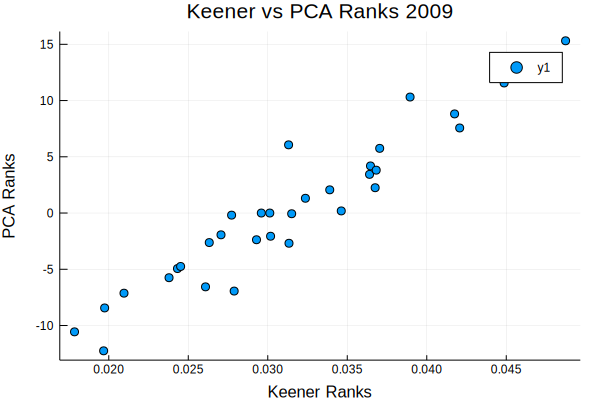

In [21]:
#plot Keener Ranks vs PCA, the closer this data is to a line, the more the two methods agree on rankings
plot(Keenersolution, PCARanks,seriestype=:scatter, title = "Keener vs PCA Ranks 2009", xlabel = "Keener Ranks", ylabel = "PCA Ranks")

In [23]:
showrankings(teamsToIndex,PMasseyRanks)

BAL => -18.315022826951985
SF => -21.826741576952017
NE => -22.592366576952013
KC => -27.057210326952017
MIN => -28.068929076952028
NO => -28.17439782695199
DAL => -28.611897826952
LA => -30.131429076952074
TEN => -30.35017907695199
BUF => -30.857991576952028
SEA => -31.56111657695201
GB => -31.74861657695207
PHI => -32.50252282695195
PIT => -33.26814782695197
ATL => -34.04158532695202
CLE => -34.42049157695202
TB => -34.799397826951974
CHI => -36.111897826952
LAC => -36.510335326952045
HOU => -36.71346032695199
ARI => -36.72127282695197
DEN => -37.936116576951996
IND => -38.36189782695193
JAX => -38.84627282695201
DET => -39.76814782695202
NYJ => -40.04549157695198
CAR => -40.299397826951974
NYG => -42.24080407695197
OAK => -42.385335326951996
CIN => -43.45174157695202
WAS => -45.20564782695191
MIA => -47.37361657695199


In [24]:
showrankings(teamsToIndex,PCARanks)

BAL => 15.3125
SF => 11.5625
NE => 10.3125
KC => 8.8125
NO => 7.5625
DAL => 6.0625
MIN => 5.75
GB => 4.1875
LA => 3.8125
TEN => 3.4375
SEA => 2.25
BUF => 2.0625
TB => 1.3125
HOU => 0.1875
PHI => 0.0
ATL => -0.0625
CHI => -0.1875
CLE => -1.9375
DEN => -2.0625
LAC => -2.375
ARI => -2.625
IND => -2.6875
DET => -4.75
NYJ => -4.9375
JAX => -5.75
OAK => -6.5625
CAR => -6.9375
CIN => -7.125
NYG => -8.4375
WAS => -10.5625
MIA => -12.25


In [25]:
showrankings(teamsToIndex,Keenersolution)

BAL => 0.04873135221383413
SF => 0.044866125017291314
NO => 0.04207109428895786
KC => 0.04174991980880386
NE => 0.03895098720661669
MIN => 0.03703938361195578
LA => 0.03682046526224116
SEA => 0.03675451992956661
GB => 0.036461050523615715
TEN => 0.03640139370815651
HOU => 0.03462253035689204
BUF => 0.03389800202531901
TB => 0.03236745984529826
ATL => 0.03150399266812964
IND => 0.03133498997065209
DAL => 0.03130981890950565
DEN => 0.030177544768385915
PIT => 0.03012814521210549
PHI => 0.029593923086356964
LAC => 0.029290966444676072
CAR => 0.027886389289036397
CHI => 0.027725393712126605
CLE => 0.02705895306685386
ARI => 0.026320060333007496
OAK => 0.026084359902014763
DET => 0.024519024941519165
NYJ => 0.024322020517069273
JAX => 0.023790737883330058
CIN => 0.02095729160579676
NYG => 0.01974011036916492
MIA => 0.019676839069781918
WAS => 0.01784515445193814
